<a href="https://colab.research.google.com/github/jeetshah0303/Artificialintelligence/blob/main/PADLab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Exp 9: Anomaly detection using Autoencoder

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Download the Dataset
PATH_TO_DATA = 'http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv'
data = pd.read_csv(PATH_TO_DATA, header=None)

In [ ]:
print(data.shape)

(4998, 141)


In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [ ]:
Target = 140

In [ ]:
features = data.drop(Target, axis=1)
target = data[Target]

In [ ]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(features, target, test_size=0.2, stratify=target, random_state=1)

In [ ]:
xTrain.shape

(3998, 140)

In [ ]:
yTrain.shape

(3998,)

In [ ]:
# Consider only those samples where the index is 1, i.e. normal samples
train_index = yTrain[yTrain == 1].index
trainData = xTrain.loc[train_index]
trainData.shape

(2335, 140)

In [ ]:
# Preprocess the Data
from sklearn.preprocessing import MinMaxScaler
min_MaxScaler = MinMaxScaler(feature_range=(0, 1))
xTrainScaled = min_MaxScaler.fit_transform(trainData)
xTestScaled = min_MaxScaler.fit_transform(xTest)

In [ ]:
xTrainScaled.shape

(2335, 140)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras

In [ ]:
# Input shape, Required for first layer of deep neural network
inputShape = keras.Input(shape=(xTrainScaled.shape[1],)) # Shape of 140, Input neuron

In [ ]:
# Building the Encoder
x = Dense(64, activation='relu')(inputShape)
x = Dropout(0.1)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.1)(x)
x = Dense(16, activation='relu')(x)
x = Dropout(0.1)(x)
encoderLayer = Dense(xTrainScaled.shape[1], activation='sigmoid')(x)

In [ ]:
# Building the Decoder
x = Dense(16, activation='relu')(encoderLayer)
x = Dropout(0.1)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.1)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.1)(x)
decoderLayer = Dense(xTrainScaled.shape[1], activation='sigmoid')(x)

In [ ]:
# Defining the Autoencoder
autoencoder = keras.Model(inputShape, decoderLayer)

In [ ]:
# Compiling the Model
autoencoder.compile(loss='msle', metrics=['mse'], optimizer='adam')

In [ ]:
# Fit the Model
history = autoencoder.fit(xTrainScaled, xTrainScaled, epochs=20, 
                          batch_size=512, 
                          validation_data=(xTestScaled, xTestScaled))

Epoch 1/20
5/5 [==============================] - 1s 50ms/step - loss: 0.0106 - mse: 0.0239 - val_loss: 0.0132 - val_mse: 0.0306
Epoch 2/20
5/5 [==============================] - 0s 14ms/step - loss: 0.0100 - mse: 0.0225 - val_loss: 0.0130 - val_mse: 0.0301
Epoch 3/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0093 - mse: 0.0208 - val_loss: 0.0130 - val_mse: 0.0300
Epoch 4/20
5/5 [==============================] - 0s 15ms/step - loss: 0.0083 - mse: 0.0185 - val_loss: 0.0135 - val_mse: 0.0308
Epoch 5/20
5/5 [==============================] - 0s 18ms/step - loss: 0.0073 - mse: 0.0163 - val_loss: 0.0141 - val_mse: 0.0321
Epoch 6/20
5/5 [==============================] - 0s 18ms/step - loss: 0.0066 - mse: 0.0147 - val_loss: 0.0142 - val_mse: 0.0321
Epoch 7/20
5/5 [==============================] - 0s 14ms/step - loss: 0.0060 - mse: 0.0134 - val_loss: 0.0139 - val_mse: 0.0315
Epoch 8/20
5/5 [==============================] - 0s 13ms/step - loss: 0.0057 - mse: 0.0127 - val

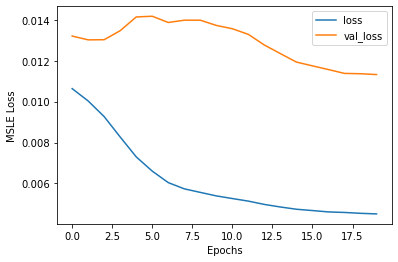

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])

In [ ]:
def findThreshold(model, xTrainScaled):
    reconstructions = model.predict(xTrainScaled)
    reconstructionErrors = keras.losses.msle(reconstructions, xTrainScaled)
    
    threshold = np.mean(reconstructionErrors.numpy()) + np.std(reconstructionErrors.numpy())
    return threshold

In [ ]:
def getPredictions(model, xTestScaled, threshold):
    predictions = model.predict(xTestScaled)
    errors = keras.losses.msle(predictions, xTestScaled)
    
    anomalyMask = pd.Series(errors) > threshold
    
    preds = anomalyMask.map(lambda x: 0.0 if x == True else 1.0)
    return preds

In [ ]:
threshold = findThreshold(autoencoder, xTrainScaled)
print(threshold)

0.009861804304962064


In [ ]:
pfrom sklearn.metrics import accuracy_score
preds = getPredictions(autoencoder, xTestScaled, threshold)
accuracy_score(preds, yTest)

0.855